# **Importing all the required libraries**

In [ ]:
# importing tabular data and matrices handlers
import numpy as np
import pandas as pd

# importing modeling helpers
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, cross_val_score

# importing preprocessing helpers
from sklearn.preprocessing import StandardScaler

# importing regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# importing evaluating metrics
from sklearn.metrics import mean_squared_error, r2_score

# importing time keeper
import time

# importing pipelining helpers
from sklearn.pipeline import Pipeline

# importing visualization packages
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

# configuring visualizations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.rcParams['figure.figsize'] = [25,7]

# **Data Accessing**

In [ ]:
# reading the dataset in a dataframe
df_diamonds = pd.read_csv("diamonds.csv")

# **Data Preprocessing**

## **Data Analysis**

In [ ]:
# viewing the shape of the dataset
df_diamonds.shape

(53940, 11)

In [ ]:
# viewing the high level information of the dataset
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# viewing first five rows of the dataset
df_diamonds.head().style.hide_index()

Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.230000,Ideal,E,SI2,61.500000,55.000000,326,3.950000,3.980000,2.430000
2,0.210000,Premium,E,SI1,59.800000,61.000000,326,3.890000,3.840000,2.310000
3,0.230000,Good,E,VS1,56.900000,65.000000,327,4.050000,4.070000,2.310000
4,0.290000,Premium,I,VS2,62.400000,58.000000,334,4.200000,4.230000,2.630000
5,0.310000,Good,J,SI2,63.300000,58.000000,335,4.340000,4.350000,2.750000


In [ ]:
# viewing last five rows of the dataset
df_diamonds.tail().style.hide_index()

Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53936,0.720000,Ideal,D,SI1,60.800000,57.000000,2757,5.750000,5.760000,3.500000
53937,0.720000,Good,D,SI1,63.100000,55.000000,2757,5.690000,5.750000,3.610000
53938,0.700000,Very Good,D,SI1,62.800000,60.000000,2757,5.660000,5.680000,3.560000
53939,0.860000,Premium,H,SI2,61.000000,58.000000,2757,6.150000,6.120000,3.740000
53940,0.750000,Ideal,D,SI2,62.200000,55.000000,2757,5.830000,5.870000,3.640000


In [ ]:
# checking null values in the dataset
df_diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**There are no null values present in the dataset**

In [ ]:
# viewing the statistical data of the features in the dataset
df_diamonds.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,26970.500000,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


## **Dropping unnecessary column**

**The first column (Unamed: 0) is a repeated index, and it won't be needed for further anaysis. Hence, dropping the column.**

In [ ]:
# dropping unnecessary column from the dataset
df_diamonds.drop(columns=['Unnamed: 0'], inplace = True)

## **Removing faulty data**

**From the statistical data, it can be observed that the minimum values in the dimensions(x,y,z) columns is 0. Since x, y, and z represent length, width, and height respectively, it's impossible for a diamond to have a zero dimension. This is faulty data.**

In [ ]:
# Checking for value 0 in the columns 'x', 'y' and 'z'
df_diamonds[np.logical_or(np.logical_or(df_diamonds['x'] == 0, df_diamonds['y'] == 0), df_diamonds['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [ ]:
len(df_diamonds[np.logical_or(np.logical_or(df_diamonds['x'] == 0, df_diamonds['y'] == 0), df_diamonds['z'] == 0)])

20

**It can be observed that there are 20 rows with zero dimension. Hence, dropping those rows.**

In [ ]:
# dropping rows with value 0 in the columns x, y, and z
rows=['x', 'y', 'z']
df_diamonds[rows] = df_diamonds[rows].replace(0, np.NaN)
df_diamonds.dropna(subset=rows, inplace=True)

In [ ]:
df_diamonds.shape

(53920, 10)

## **Removing duplicate rows**

In [ ]:
# checking for duplicate data
df_diamonds[df_diamonds.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47296,0.30,Good,J,VS1,63.4,57.0,394,4.23,4.26,2.69
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [ ]:
# dropping for duplicate data
df_diamonds = df_diamonds.drop_duplicates()

In [ ]:
# checking the shape of the dataset
df_diamonds.shape

(53775, 10)

**After cleaning the null values in the columns 'x', 'y' and 'z',  20 rows of data are removed from the dataset**

## **Viewing correlation matrix and histograms**

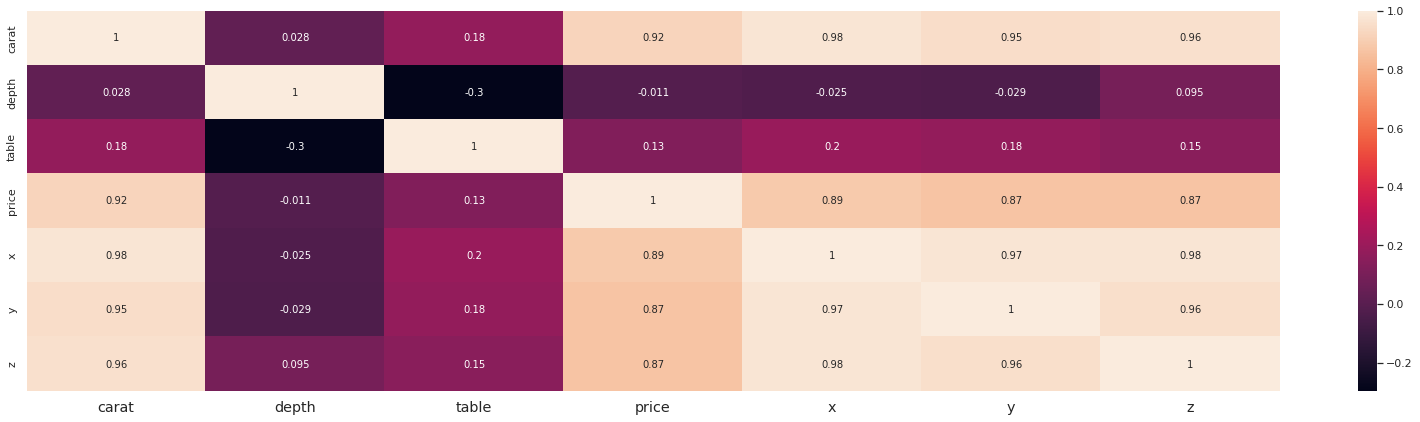

In [ ]:
corr_matrix = df_diamonds.corr()
sns.heatmap(corr_matrix, annot=True);

**From the correlation matrix, following can be observed:**

1. The price of the diamond is highly correlated with the carat and the dimensions (x,y,z). Since the intention is to perform multivariate regression, "carat" won't be considered for predicting the price of the diamond. Hence, the dimensions of the diamond would have the most significant impact on its price.
2. The carat of the diamond is highly correlated with the price and the dimensions (x,y,z). Since the intention is to perform multivariate regression, "price" won't be considered for predicting the carat of the diamond. Hence, the dimensions of the diamond would have the most significant impact on its carat.
3. Price and the Carat of the diamond are not correlated with its depth and table.

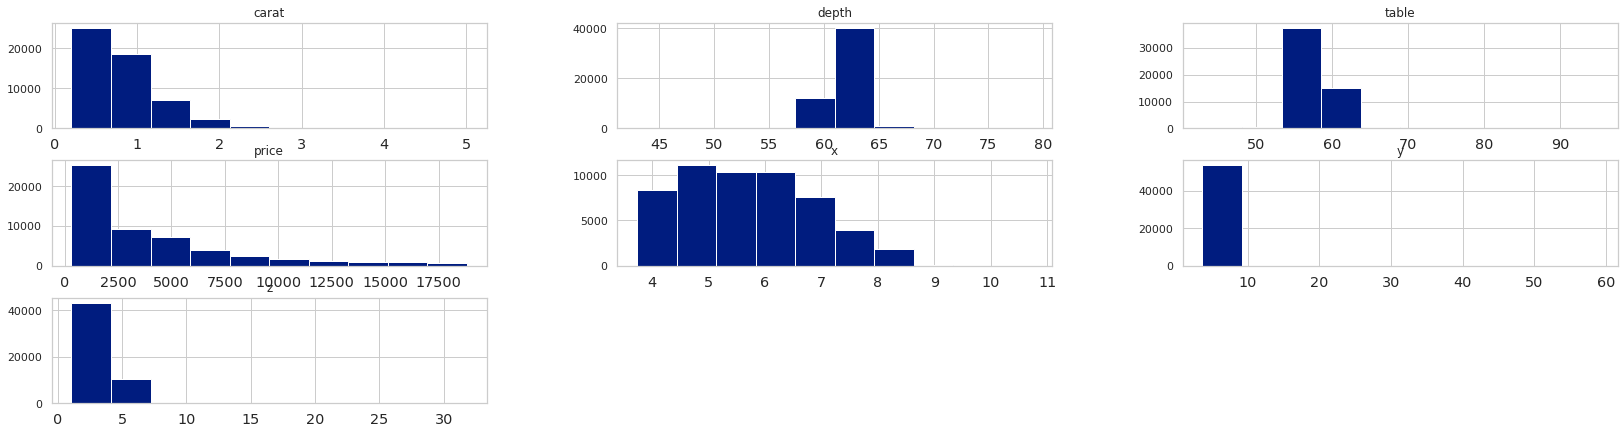

In [ ]:
df_diamonds.hist();

**Visual Characteristics of the data**
1. The attributes price, carat, and table dept are having rightly skewed data
2. Most of the attibutes follows different distributions

## **Checking and visualizing categorical data**

In [ ]:
# checking the values for each categorical variable
categorical_cols = ['cut','color','clarity']
for column in categorical_cols:
    print('Unique {} attributes:'.format(column))
    display(df_diamonds[column].unique().tolist())

Unique cut attributes:


['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

Unique color attributes:


['E', 'I', 'J', 'H', 'F', 'G', 'D']

Unique clarity attributes:


['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

**Visualizing relationships between categorical variables and target variable**

In [ ]:
def barplots(variables,target_var):
    """
    Function to plot graphical relationship
    between categorical variables.
    """
    for num, attribute in enumerate(variables):
        plt.figure(num)
        sns.barplot(x=attribute, y = target_var, data=df_diamonds)

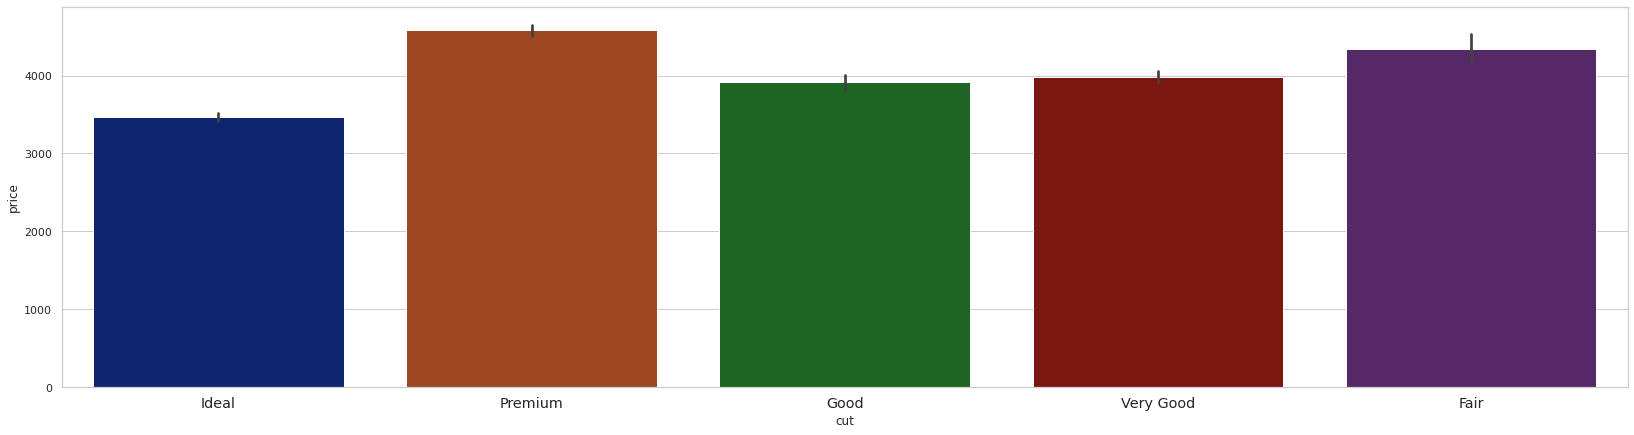

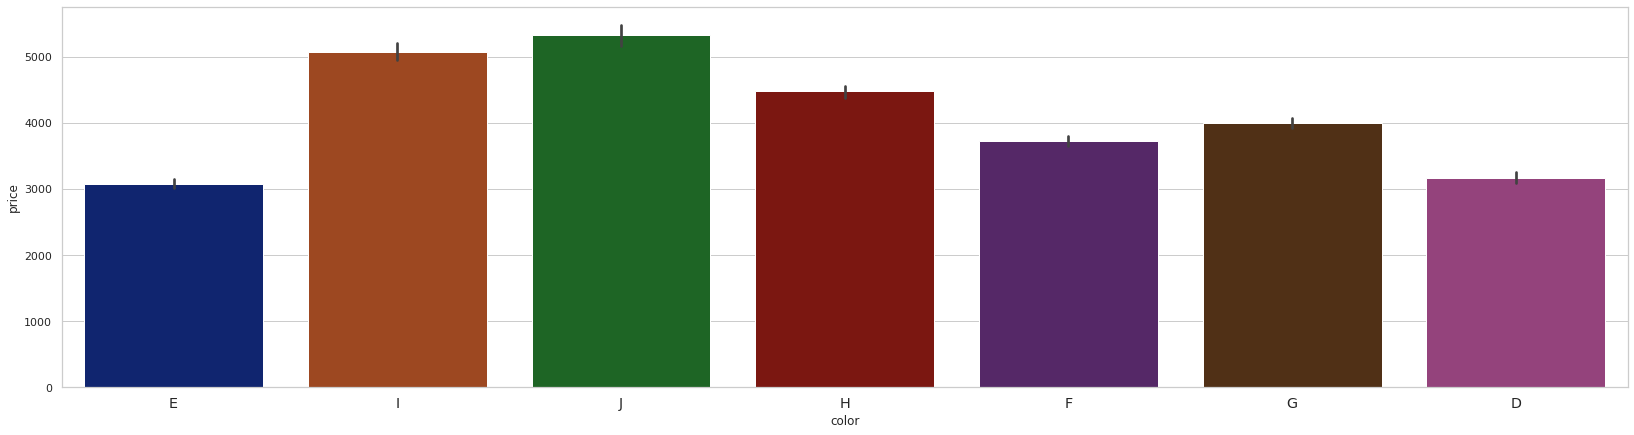

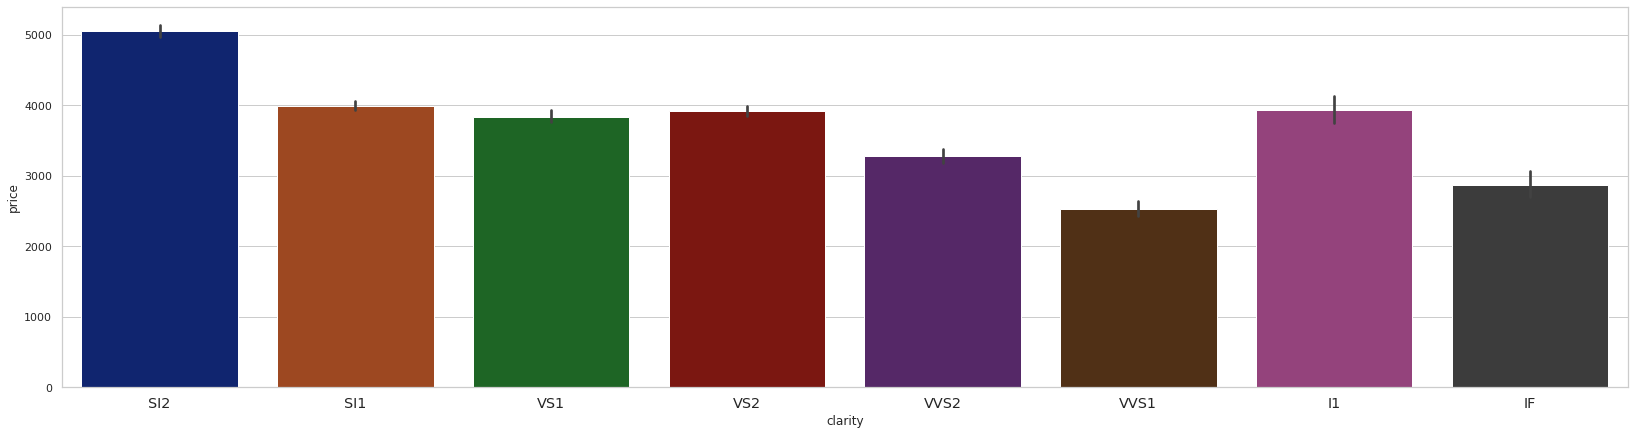

In [ ]:
barplots(categorical_cols,'price')

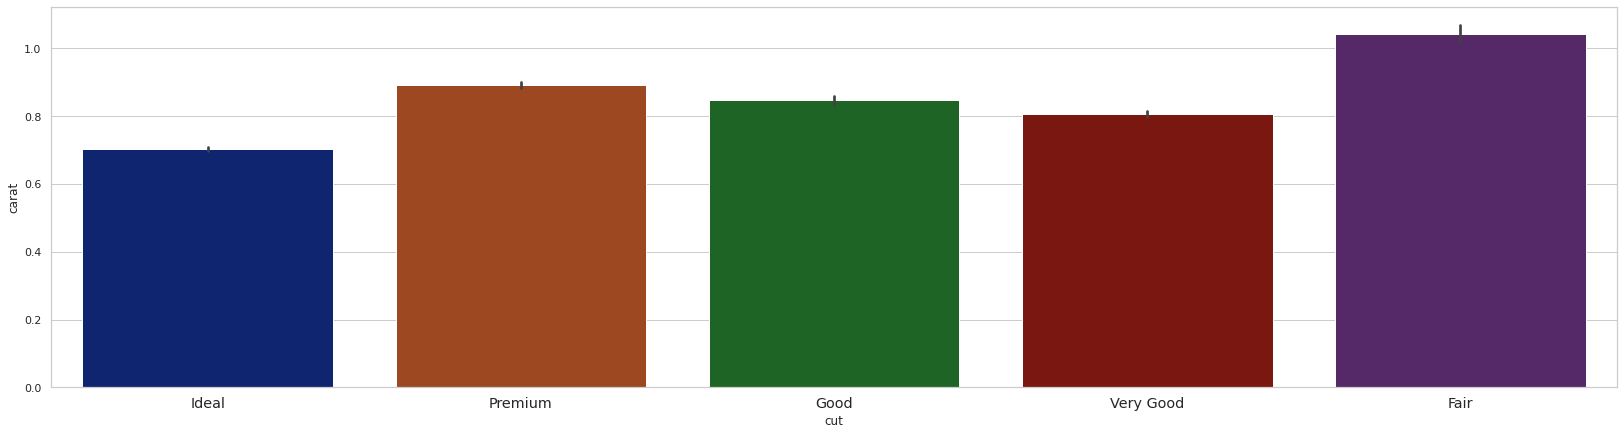

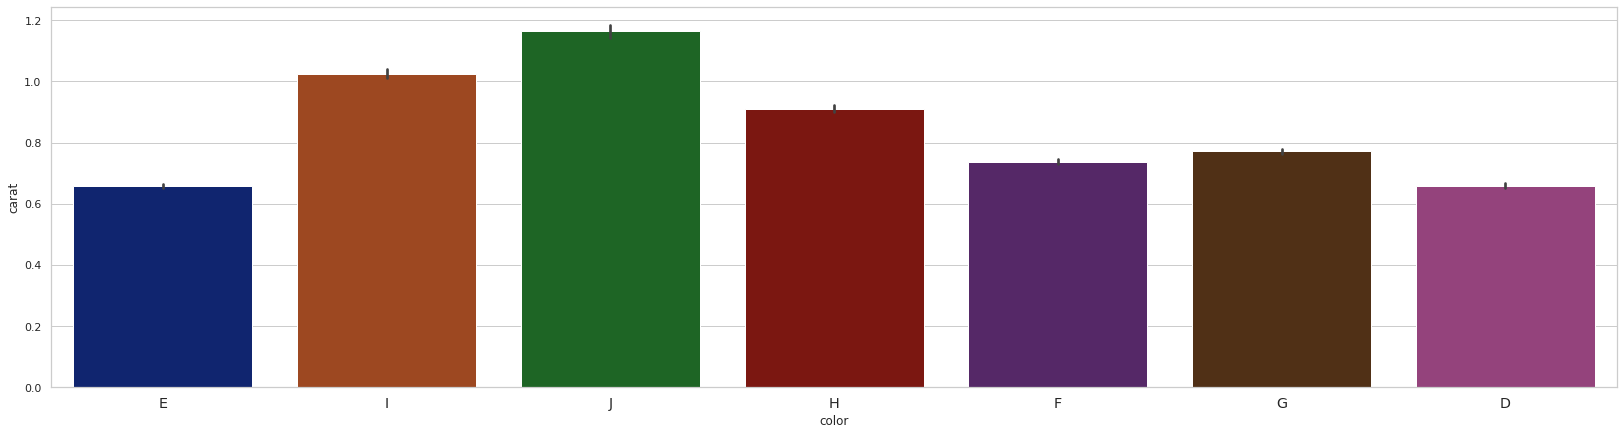

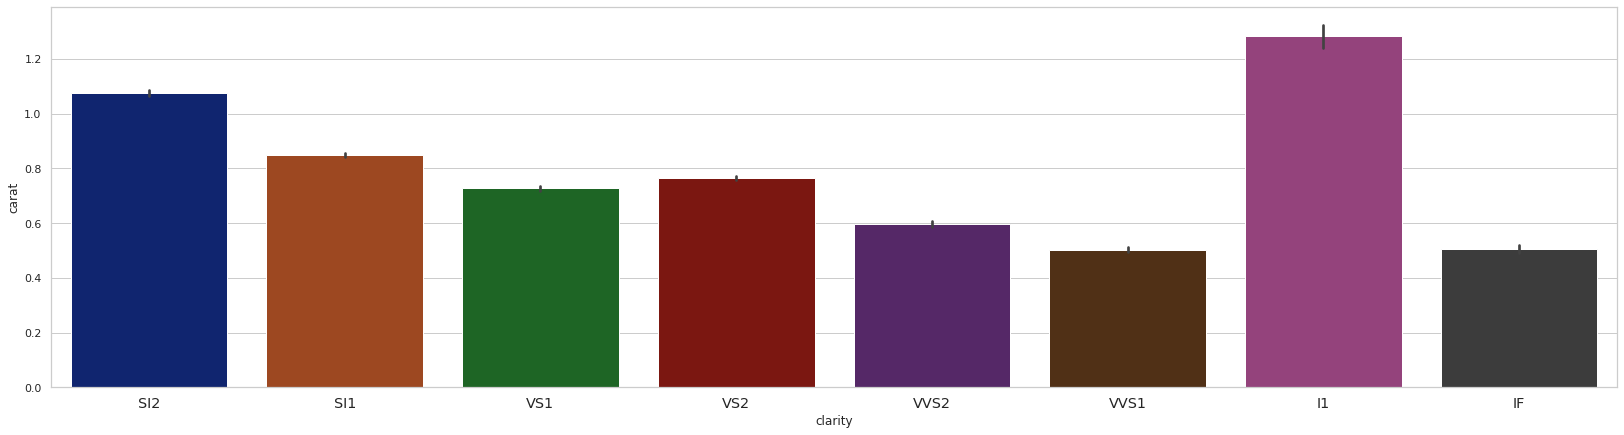

In [ ]:
barplots(categorical_cols,'carat')

**From the barplots, it can be observed that even if the Cut quality(Best = Ideal, Worst = Fair), Clarity Quality(Best = IF, Worst = IF) and Color Quality(Best = D, Worst = J) increases respectively, the price and carat doesn't seems to be matching, one possible reason for this could be the saturation of the qualities of diamonds, hence we will try encoding these categorical variables and then try comparing.**

## **Generating pairplot**

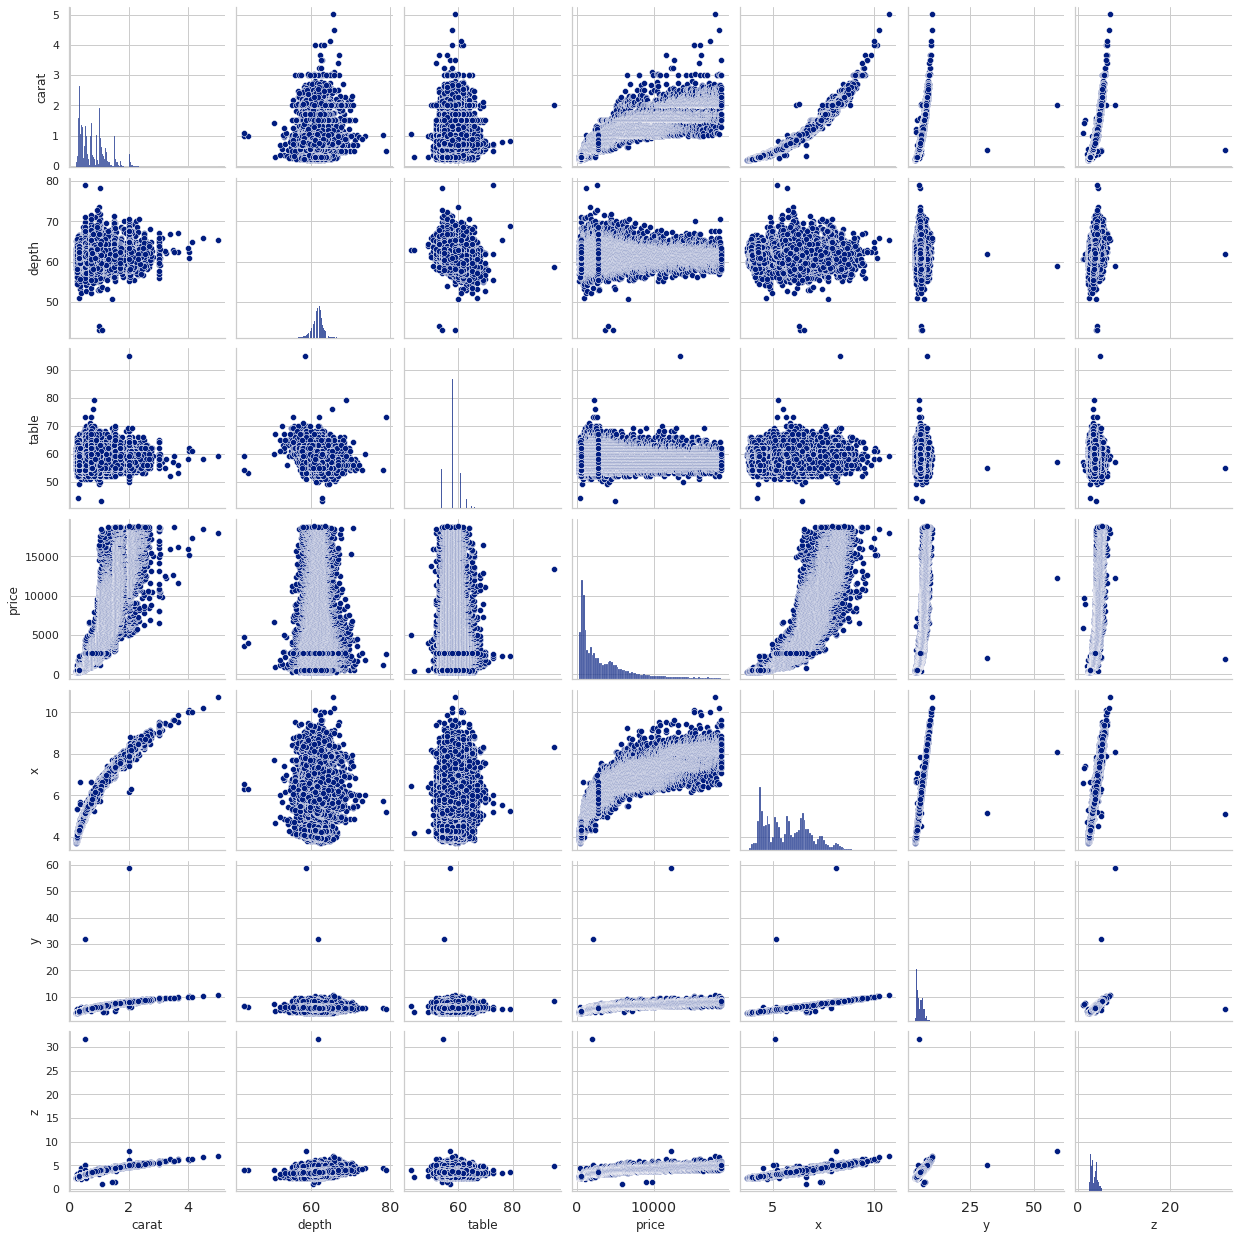

In [ ]:
# plotting pairplot of the data
sns.pairplot(df_diamonds)

**From the pairplot, following can be observed:**

1. There are certain feature variables which can be classified as outliers, because they seem to be far from the rest of the datapoints, which may play an important role in accuracy calculation of the model.
2. Some of the vaiables having datapoints far from rest of points are 'y', 'z', and going forward, a decision should be made whther or not to keep them, depending on the accuracy.

In [ ]:
# making a copy of the dataset to avoid any changes in original data.
df_diamond = df_diamonds.copy()

## **Handling categorical variables**

In [ ]:
# handling Categorical Varibales
df_diamond = pd.get_dummies(df_diamonds, columns = categorical_cols)

In [ ]:
df_diamond

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_diamond.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,...,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,61.748232,57.457806,3931.220288,5.731579,5.734909,3.539964,0.029698,0.090897,0.399535,...,0.100530,0.052106,0.013705,0.033175,0.242306,0.170005,0.151650,0.227336,0.067801,0.094021
std,0.473169,1.429639,2.233257,3985.918716,1.118611,1.139451,0.702017,0.169754,0.287466,0.489807,...,0.300708,0.222243,0.116266,0.179096,0.428482,0.375640,0.358685,0.419115,0.251406,0.291861
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Data Splitting**

In [ ]:
# dividing data into homogeneous subgroups via stratified sampling
df_diamond['x_sample'] = pd.cut(df_diamond['x'],bins = [3, 4, 5, 6, 7, 8, 9, np.inf],
                           labels = [1, 2, 3, 4, 5, 6, 7])
df_diamond['x_sample'].value_counts()

2    17059
4    15000
3    14039
5     5333
6     1815
1      488
7       41
Name: x_sample, dtype: int64

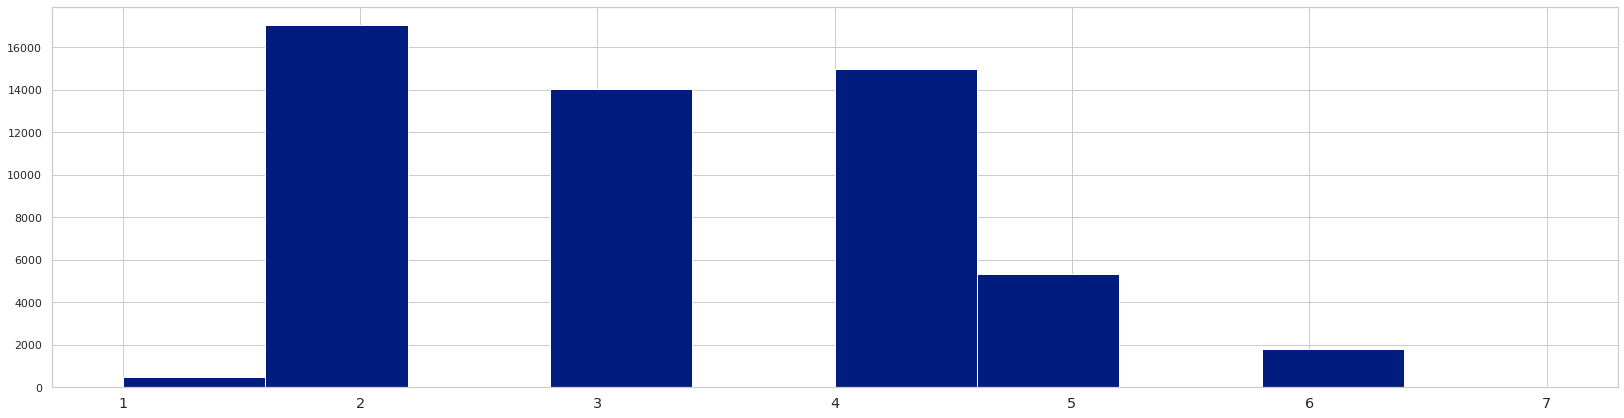

In [ ]:
# viewing examples in each strata
df_diamond['x_sample'].hist();

In [ ]:
# performing stratified sampling
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(df_diamond, df_diamond['x_sample']):
    strat_train_set = df_diamond.iloc[train_index]
    strat_test_set = df_diamond.iloc[test_index]

In [ ]:
# removing stratified variable attribute
for set in(strat_train_set, strat_test_set):
    set.drop('x_sample', axis = 1, inplace = True)

In [ ]:
# dividing the data into training and testing set
X_train_current = strat_train_set.drop(['price', 'carat'], axis=1)
y_train = strat_train_set[['price','carat']]

X_test_current = strat_test_set.drop(['price', 'carat'], axis=1)
y_test = strat_test_set[['price','carat']]

## **Feature Scaling**

In [ ]:
# feature scaling using Standard Scaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train_current)
X_test_norm = sc.transform(X_test_current)

## **Converting training and testing data to dataframe**

In [ ]:
X_train = pd.DataFrame(data=X_train_norm, index=X_train_current.index, columns=X_train_current.columns)
X_test = pd.DataFrame(data=X_test_norm, index=X_test_current.index, columns=X_test_current.columns)

# **Regression**

## **Model Building**

In [ ]:
# chossing the regression models
regression_models = ['Linear Regression', 'Lasso Regression',  'Ridge Regression', 'DecisionTree Regression', 'RandomForest Regression']

regressors = []

regressors.append(LinearRegression())
regressors.append(Lasso(alpha=0.0001))
regressors.append(Ridge())
regressors.append(DecisionTreeRegressor())
regressors.append(RandomForestRegressor())

In [ ]:
# creating lists to keep track of the training and the testing R2 Scores
train_r2_scores = []
test_r2_scores = []

# training and testing all the regression models
for regressor in regressors:
    regression_pipeline = Pipeline(steps = [
              ('regressor',regressor)
           ])
    
    print(f'************START OF THE {regressor} MODEL************\n')
    
    print(f'Training the {regressor} model')
    start_time = time.time()
    model = regression_pipeline.fit(X_train, y_train)
    end_time = time.time()
    print(f'Time taken to fit the {regressor} model: {round(end_time - start_time, 2)} seconds')
    
    train_predictions = model.predict(X_train)
    train_rmse = mean_squared_error(y_train, train_predictions)**0.5
    train_r2 = r2_score(y_train, train_predictions)
    train_r2_scores.append(train_r2)
    print('\nTraining Details:')
    print(f'{regressor} model RMSE: {train_rmse}')
    print(f'{regressor} model R2 score: {train_r2}')
    
    print(f'\nTesting the {regressor} model')

    test_predictions = model.predict(X_test)
    test_rmse = mean_squared_error(y_test, test_predictions)**0.5
    test_r2 = r2_score(y_test, test_predictions)
    test_r2_scores.append(test_r2)
    print('\nTesting Details:')
    print(f'{regressor} model RMSE: {test_rmse}')
    print(f'{regressor} model R2 score: {test_r2}')

    print(f'\n************END OF THE {regressor} MODEL************\n\n')

************START OF THE LinearRegression() MODEL************

Training the LinearRegression() model
Time taken to fit the LinearRegression() model: 0.08 seconds

Training Details:
LinearRegression() model RMSE: 1108.2663797374332
LinearRegression() model R2 score: 0.9034176686227631

Testing the LinearRegression() model

Testing Details:
LinearRegression() model RMSE: 1095.5970350088057
LinearRegression() model R2 score: 0.9034278984364339

************END OF THE LinearRegression() MODEL************


************START OF THE Lasso(alpha=0.0001) MODEL************

Training the Lasso(alpha=0.0001) model
Time taken to fit the Lasso(alpha=0.0001) model: 2.63 seconds

Training Details:
Lasso(alpha=0.0001) model RMSE: 1108.2449744679145
Lasso(alpha=0.0001) model R2 score: 0.903420796894836

Testing the Lasso(alpha=0.0001) model

Testing Details:
Lasso(alpha=0.0001) model RMSE: 1095.521220228699
Lasso(alpha=0.0001) model R2 score: 0.9034328512422534

************END OF THE Lasso(alpha=0.000

## **Model Evaluation**

In [ ]:
# comparing the training and the testing R2 Scores of all the models
model_r2_compare = pd.DataFrame({'Algorithm' : regression_models, 'Training_R2_Score' : train_r2_scores, 'Testing_R2_Score' : test_r2_scores})
model_r2_compare.sort_values(by='Testing_R2_Score', ascending=False)

,Algorithm,Training_R2_Score,Testing_R2_Score
4,RandomForest Regression,0.998416,0.989153
3,DecisionTree Regression,0.999996,0.979014
2,Ridge Regression,0.903421,0.903437
1,Lasso Regression,0.903421,0.903433
0,Linear Regression,0.903418,0.903428


[Text(0, 0, 'Linear Regression'),
 Text(0, 0, 'Lasso Regression'),
 Text(0, 0, 'Ridge Regression'),
 Text(0, 0, 'DecisionTree Regression'),
 Text(0, 0, 'RandomForest Regression')]

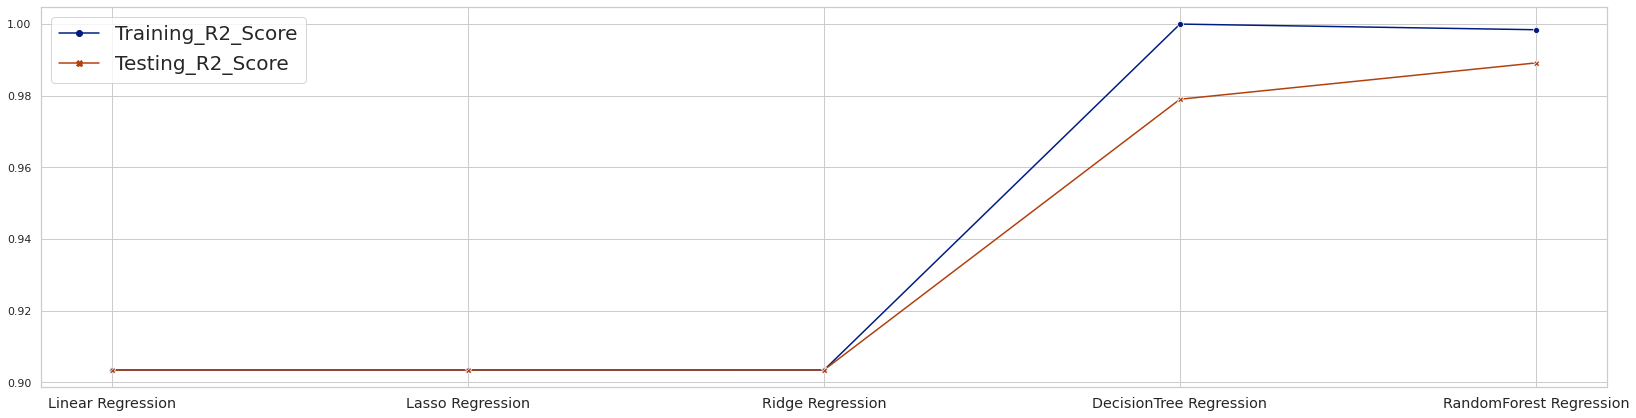

In [ ]:
# visualizing the training and the testing R2 Scores of all the models
ax = sns.lineplot(data=[model_r2_compare['Training_R2_Score'], model_r2_compare['Testing_R2_Score']], dashes=False, markers=True)
ax.set_xticks(range(len(model_r2_compare['Algorithm'])))
ax.set_xticklabels(model_r2_compare['Algorithm'])

## **Analysis of the Regression Models**

R2 Score is leveraged to evaluate the performance of the various regression models. All the regression models with default parameters are tried and the following is observed:
- R2 Score standings based on the training data is as follows:
  1. DecisionTree Regression
  2. RandomForest Regression
  3. Ridge Regression and Lasso Regression
  4. Linear Regression
- R2 Score standings based on the testing data is as follows:
  1. RandomForest Regression
  2. DecisionTree Regression
  3. Ridge Regression
  4. Lasso Regression
  5. Linear Regression
- The baseline Multivariate Linear Regression model is the least performant model as it just explains 90.34% (R2 Score) of the variability in the price and the carat of the diamond as compared to all the other models.
- The testing R2 score of the baseline Multivariate Linear Regression model, Ridge Regression model, and the Lasso Regression model are very close. This suggests that using regularization has almost no improvement over the baseline model.
- The DecisionTree Regression and the RandomForest Regression with a testing R2 score of 97.90% and 98.91%, respectively outperform the baseline Multivariate Linear Regression model, Ridge Regression model, and the Lasso Regression model by a significant margin.
- Even though the R2 Score of the DecisionTree Regressor on the training data is the highest, the RandomForest Regressor outperforms it on the testing data.
- This suggests that the RandomForest Regression model is the best model as it is able to better explain the variability in the price and carat of the diamond as compared to all the other models.

## **Hyperparameter Tuning**

Following are the most important settings for a RandomForest Regressor:
1. **n_estimators**: number of trees in the forest
2. **max_features**: maximum number of features considered for splitting a node

The above hyperparameters are tuned along with another hyperparameter named **bootstrap** that tells if the data points are sampled with or without replacement.





### **First Grid Search with Cross Validation**

In [ ]:
# storing the testing data R2 Score of the base RandomForest Regressor model
rf_base_r2 = max(model_r2_compare.sort_values(by='Testing_R2_Score', ascending=False)['Testing_R2_Score'])

In [ ]:
# initializing a list to store improvement in R2 Score using Grid Search with Cross Validation
improved_test_r2_scores = [rf_base_r2]

# initializing a list to track the run time of the improvement models that follow
run_time = []

In [ ]:
# creating the parameter grid for the first round
param_grid_one = [
                  {'bootstrap':[False, True],
                  'n_estimators':[75, 100, 125, 150],
                  'max_features':[2, 4, 6, 8, 10]}
                  ]

In [ ]:
# initializing a RandomForest Regressor
forest_reg = RandomForestRegressor()

# initializing the first grid search
grid_search_one = GridSearchCV(forest_reg, param_grid_one, cv=5, scoring='r2', return_train_score=True)

# fitting the first grid search to the training data
grid_search_one.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True],
                          'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [75, 100, 125, 150]}],
             return_train_score=True, scoring='r2')

In [ ]:
# viewing the best parameters from the first grid search
grid_search_one.best_params_

{'bootstrap': True, 'max_features': 10, 'n_estimators': 125}

In [ ]:
# initializing a RandomForest Regressor with the best parameters obtained from first grid search
random_forest_regressor = RandomForestRegressor(bootstrap=True, max_features=10, n_estimators=125)

# training and testing the model along with tracking the run time
print(f'Training the {random_forest_regressor} model')

start_time = time.time()
model = random_forest_regressor.fit(X_train, y_train)

print(f'\nTesting the {random_forest_regressor} model')

grid_one_test_predictions = model.predict(X_test)
end_time = time.time()
current_run_time = round(end_time - start_time, 2)
print(f'Time taken to fit and test the {random_forest_regressor} model: {current_run_time} seconds')
run_time.append(current_run_time)

grid_one_rmse = mean_squared_error(y_test, grid_one_test_predictions)**0.5
grid_one_r2 = r2_score(y_test, grid_one_test_predictions)
improved_test_r2_scores.append(grid_one_r2)
print('\nTesting Details:')
print(f'{random_forest_regressor} model RMSE: {grid_one_rmse}')
print(f'{random_forest_regressor} model R2 score: {grid_one_r2}')

Training the RandomForestRegressor(max_features=10, n_estimators=125) model

Testing the RandomForestRegressor(max_features=10, n_estimators=125) model
Time taken to fit and test the RandomForestRegressor(max_features=10, n_estimators=125) model: 24.99 seconds

Testing Details:
RandomForestRegressor(max_features=10, n_estimators=125) model RMSE: 387.31036998289153
RandomForestRegressor(max_features=10, n_estimators=125) model R2 score: 0.9895917765922726


In [ ]:
# viewing the improvement in the R2 Score over the base R2 Score
print(f'Improvement of {((grid_one_r2 - rf_base_r2) / rf_base_r2)}')

Improvement of 0.00044357721373167256


### **Second Grid Search with Cross Validation**

In [ ]:
# creating the parameter grid for the second round
param_grid_two = [
                  {'bootstrap':[False, True],
                  'n_estimators':[125, 200, 250, 275],
                  'max_features':[10, 12, 14, 16]}
                  ]

In [ ]:
# initializing a RandomForest Regressor
forest_reg = RandomForestRegressor()

# initializing the second grid search
grid_search_two = GridSearchCV(forest_reg, param_grid_two, cv=5, scoring='r2', return_train_score=True)

# fitting the second grid search to the training data
grid_search_two.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True],
                          'max_features': [10, 12, 14, 16],
                          'n_estimators': [125, 200, 250, 275]}],
             return_train_score=True, scoring='r2')

In [ ]:
# viewing the best parameters from the second grid search
grid_search_two.best_params_

{'bootstrap': True, 'max_features': 14, 'n_estimators': 275}

In [ ]:
# initializing a RandomForest Regressor with the best parameters obtained from second grid search
random_forest_regressor = RandomForestRegressor(bootstrap=True, max_features=14, n_estimators=275)

# training and testing the model along with tracking the run time
print(f'Training the {random_forest_regressor} model')

start_time = time.time()
model = random_forest_regressor.fit(X_train, y_train)

print(f'\nTesting the {random_forest_regressor} model')

grid_two_test_predictions = model.predict(X_test)
end_time = time.time()
current_run_time = round(end_time - start_time, 2)
print(f'Time taken to fit and test the {random_forest_regressor} model: {current_run_time} seconds')
run_time.append(current_run_time)

grid_two_rmse = mean_squared_error(y_test, grid_two_test_predictions)**0.5
grid_two_r2 = r2_score(y_test, grid_two_test_predictions)
improved_test_r2_scores.append(grid_two_r2)
print('\nTesting Details:')
print(f'{random_forest_regressor} model RMSE: {grid_two_rmse}')
print(f'{random_forest_regressor} model R2 score: {grid_two_r2}')

Training the RandomForestRegressor(max_features=14, n_estimators=275) model

Testing the RandomForestRegressor(max_features=14, n_estimators=275) model
Time taken to fit and test the RandomForestRegressor(max_features=14, n_estimators=275) model: 54.69 seconds

Testing Details:
RandomForestRegressor(max_features=14, n_estimators=275) model RMSE: 385.91257913712803
RandomForestRegressor(max_features=14, n_estimators=275) model R2 score: 0.989644498365932


In [ ]:
# viewing the improvement in the R2 Score over the base R2 Score
print(f'Improvement of {(grid_two_r2 - rf_base_r2) / rf_base_r2}')

Improvement of 0.0004968771310152843


In [ ]:
# intializing the list using the base and the improved RandomForest Regression models
improved_reg_models = ['RandomForestRegression', 'RandomForestRegression_GridSearchOne', 'RandomForestRegression_GridSearchTwo']

In [ ]:
# comparing the testing data R2 Score of the base and the improved RandomForest Regression models
improved_model_r2_compare = pd.DataFrame({'Algorithm' : improved_reg_models, 'Improved_Testing_R2_Score' : improved_test_r2_scores})
improved_model_r2_compare.sort_values(by='Improved_Testing_R2_Score', ascending=False)

,Algorithm,Improved_Testing_R2_Score
2,RandomForestRegression_GridSearchTwo,0.989644
1,RandomForestRegression_GridSearchOne,0.989592
0,RandomForestRegression,0.989153


[Text(0, 0, 'RandomForestRegression'),
 Text(0, 0, 'RandomForestRegression_GridSearchOne'),
 Text(0, 0, 'RandomForestRegression_GridSearchTwo')]

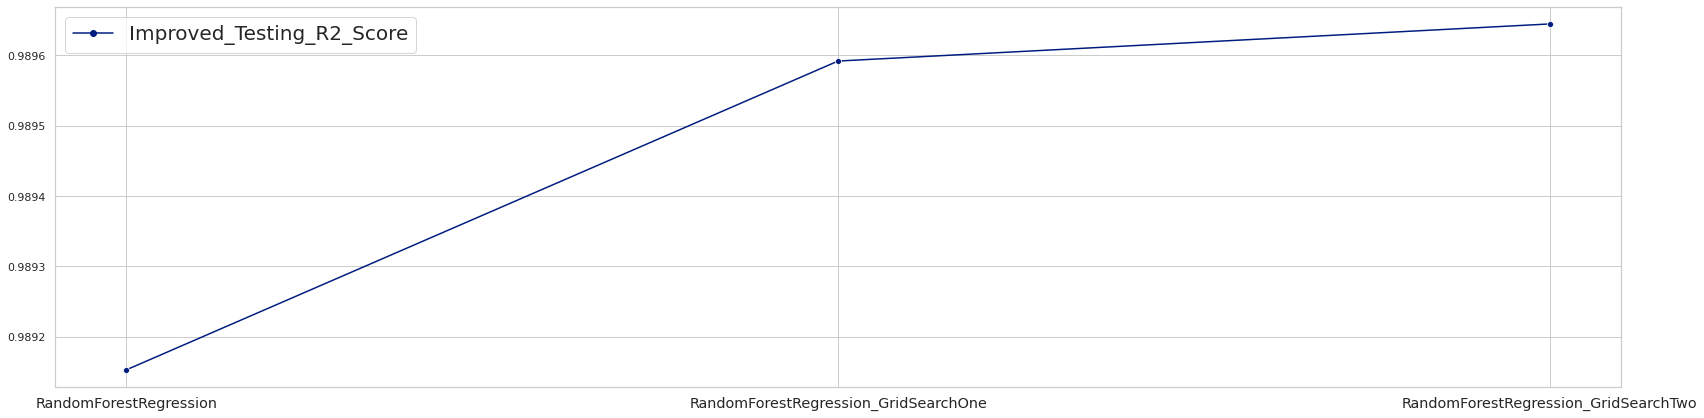

In [ ]:
# visualizing the testing data R2 Scores of the base and the improved RandomForest Regression models
ax = sns.lineplot(data=[improved_model_r2_compare['Improved_Testing_R2_Score']], dashes=False, markers=True)
ax.set_xticks(range(len(improved_model_r2_compare['Algorithm'])))
ax.set_xticklabels(improved_model_r2_compare['Algorithm'])

### **Analysis of the Improved RandomForest Regression models**

Just like the base RandomForest Regression model, R2 Score is leveraged to evaluate the performance of the improved RandomForest Regression models. The improved models are tried with the best parameters that are given by the grid search with cross validation and the following is observed:
- R2 Score standings based on the testing data is as follows:
  1. RandomForest Regression using Second Grid Search
  2. RandomForest Regression using First Grid Search
  3. Base RandomForest Regression
- The Base RandomForest Regression model is the least performant model as it explains 98.91% (R2 Score) of the variability in the price and the carat of the diamond as compared to the improved models.
- The RandomForest Regression using Second Grid Search and the RandomForest Regression using First Grid Search with a testing data R2 score of 98.95% and 98.96%, respectively outperform the base RandomForest Regression model by a very small margin.
- The RandomForest Regression using Second Grid Search outperforms RandomForest Regression using First Grid Search on the testing data with an approximate margin of 0.01%.
- This suggests that the RandomForest Regression model using Second Grid Search is the best model as it is able to better explain the variability in the price and carat of the diamond as compared to all the other models.

## **Most Important Features**

In [ ]:
# viewing numerical feature importances
importances = list(model.feature_importances_)

# getting the columns of the training data
features = X_train.columns

In [ ]:
# viewing the most important features
importances = [round(importance,2) for importance in importances]
df_feature_imp = pd.DataFrame({'Feature' : features, 'Importance' : importances})
df_feature_imp.sort_values(by='Importance', ascending=False, inplace=True)
df_feature_imp

,Feature,Importance
3,y,0.52
2,x,0.27
4,z,0.11
20,clarity_SI2,0.02
24,clarity_VVS2,0.01
14,color_H,0.01
19,clarity_SI1,0.01
17,clarity_I1,0.01
16,color_J,0.01
15,color_I,0.01


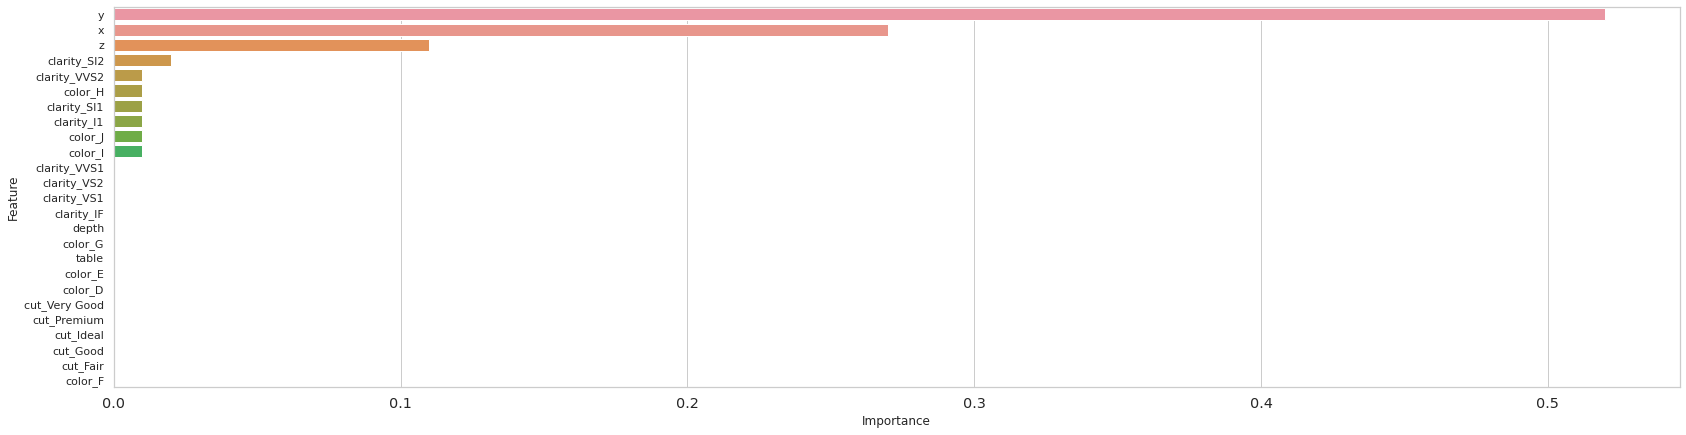

In [ ]:
# visualizing the feature importances
sns.barplot(x="Importance", y="Feature", data=df_feature_imp)

### **Analysis of the most important features**

The features importances demonstrate the following:
1. With an importance of 0.52, feature y (width) of the diamond is the most important feature for predicting the target variables i.e. price and carat of the diamond.
2. The remaining dimensions of the diamond, which are x (length) and z (height), follow up in second and third place with an importance of 0.27 and 0.11, respectively.
3. With an importance of 0.02, the clarity SI2 of the diamond follows up next.
4. With an importance of 0.01, the clarities such as VVS2, SI1, and I1 and, colors such as H, J, and I of the diamond are the ones that follow up at last. 
6. Hence, it can be said that the dimension (length, width, and height) of the diamond, specifically the width, has the highest impact on its price and carat.
7. To some extent, even certain type of clarities and colors of the diamond have an impact on its price and carat.
8. The cut of the diamond seems to have almost negligible impact on its price and carat.

## **Rebuilding and Evaluating model with Reduced Number of Features**

In [ ]:
# storing the names of the ten most important features
important_feature_columns = df_feature_imp['Feature'][0:10]
important_feature_columns

3                y
2                x
4                z
20     clarity_SI2
24    clarity_VVS2
14         color_H
19     clarity_SI1
17      clarity_I1
16         color_J
15         color_I
Name: Feature, dtype: object

In [ ]:
# creating the new train and test data with just the most important features
important_X_train = X_train[important_feature_columns]
important_X_test = X_test[important_feature_columns]

In [ ]:
# initializing a RandomForest Regressor
random_forest_regressor_imp = RandomForestRegressor()

# training and testing the model along with tracking the run time
print(f'Training the {random_forest_regressor_imp} model')

start_time = time.time()
imp_model = random_forest_regressor_imp.fit(important_X_train, y_train)

print(f'\nTesting the {random_forest_regressor_imp} model')

important_test_predictions = imp_model.predict(important_X_test)
end_time = time.time()
current_run_time = round(end_time - start_time, 2)
print(f'Time taken to fit and test the {random_forest_regressor_imp} model: {current_run_time} seconds')
run_time.append(current_run_time)

important_rmse = mean_squared_error(y_test, important_test_predictions)**0.5
important_r2 = r2_score(y_test, important_test_predictions)
improved_test_r2_scores.append(important_r2)
print('\nTesting Details:')
print(f'{random_forest_regressor_imp} model RMSE: {important_rmse}')
print(f'{random_forest_regressor_imp} model R2 score: {important_r2}')

Training the RandomForestRegressor() model

Testing the RandomForestRegressor() model
Time taken to fit and test the RandomForestRegressor() model: 12.71 seconds

Testing Details:
RandomForestRegressor() model RMSE: 534.3140029487612
RandomForestRegressor() model R2 score: 0.9808954215681345


In [ ]:
# viewing the improvement in the R2 Score over the Second Grid Search R2 Score
print(f'Improvement of {(important_r2 - grid_two_r2) / grid_two_r2}')

Improvement of -0.008840625913895096


In [ ]:
# adding the important feature model to the existing list
improved_reg_models.append('RandomForestRegression_ImportantFeatures')

In [ ]:
# comparing the testing data R2 Score of the base, improved, and most important feature RandomForest Regression models
improved_model_r2_compare = pd.DataFrame({'Algorithm' : improved_reg_models, 'Improved_Testing_R2_Score' : improved_test_r2_scores})
improved_model_r2_compare.sort_values(by='Improved_Testing_R2_Score', ascending=False)

,Algorithm,Improved_Testing_R2_Score
2,RandomForestRegression_GridSearchTwo,0.989644
1,RandomForestRegression_GridSearchOne,0.989592
0,RandomForestRegression,0.989153
3,RandomForestRegression_ImportantFeatures,0.980895


[Text(0, 0, 'RandomForestRegression'),
 Text(0, 0, 'RandomForestRegression_GridSearchOne'),
 Text(0, 0, 'RandomForestRegression_GridSearchTwo'),
 Text(0, 0, 'RandomForestRegression_ImportantFeatures')]

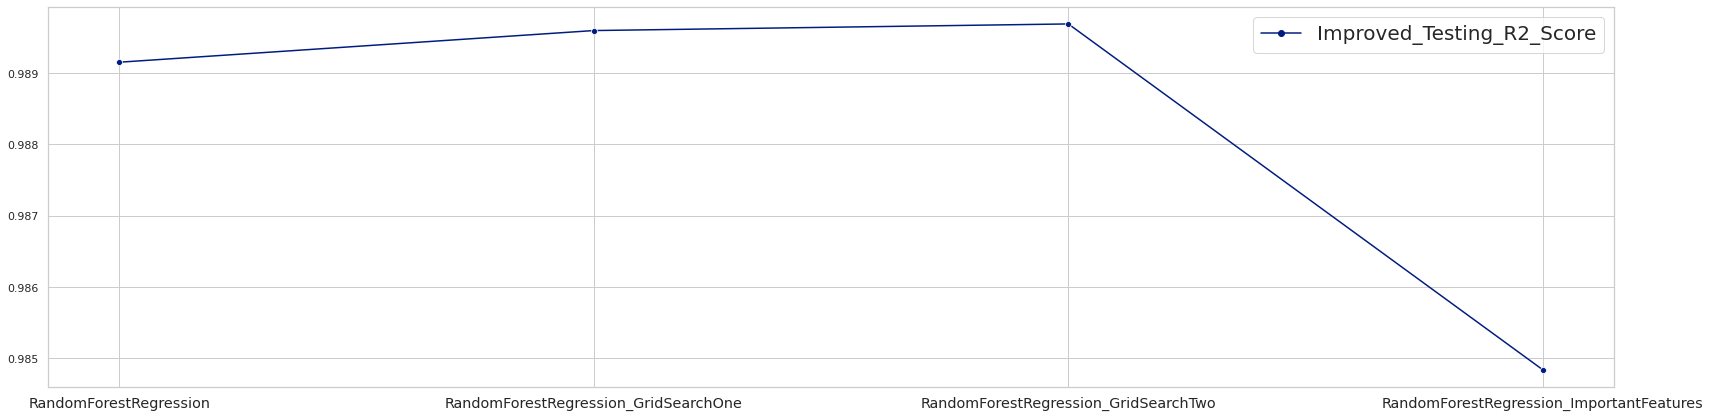

In [ ]:
# visualizing the testing data R2 Scores of the base, improved, and most important feature RandomForest Regression models
ax = sns.lineplot(data=[improved_model_r2_compare['Improved_Testing_R2_Score']], dashes=False, markers=True)
ax.set_xticks(range(len(improved_model_r2_compare['Algorithm'])))
ax.set_xticklabels(improved_model_r2_compare['Algorithm'])

Just like the metrics for all the other models, R2 Score is leveraged to evaluate the performance of the RandomForest Regression model with most important features. Only the most important features are used as part of the regression and the following is observed:
- R2 Score standings based on the testing data is as follows:
  1. RandomForest Regression using Second Grid Search
  2. RandomForest Regression using First Grid Search
  3. Base RandomForest Regression
  4. RandomForest Regression with Most Important Features
- The RandomForest Regression with Most Important Features model is the least performant model as it explains 98.08% (R2 Score) of the variability in the price and the carat of the diamond as compared to the other models.
- The RandomForest Regression using Second Grid Search outperforms RandomForest Regression with Most Important Features on the testing data with an approximate margin of 0.89%.
- This suggests that the RandomForest Regression using Second Grid Search model is the best model as it is able to better explain the variability in the price and carat of the diamond as compared to all the other models.
- Though the performance decreases by a marginal amount, the run time decreases as well i.e. it takes less time to fit the training data and to test the model.
- The final decision as to how many features to keep is therefore a trade-off between the R2 Score and Run Time of the models.

In [ ]:
# storing the R2 Scores and Run Time
all_features_r2_score = round(improved_test_r2_scores[-2], 4) * 100
most_imp_features_r2_score = round(improved_test_r2_scores[-1], 4) * 100

all_features_run_time = round(run_time[-2], 2)
most_imp_features_run_time = round(run_time[-1], 2)

In [ ]:
# comparing the RandomForest Regression using Second Grid Search model with the RandomForest Regression with Most Important Features model
comp_trade_off = pd.DataFrame({'features': ['All 25 Features', '10 Most Important Features'],
                               'r2_score': [all_features_r2_score, most_imp_features_r2_score],
                               'run_time': [all_features_run_time, most_imp_features_run_time]})

comp_trade_off

,features,r2_score,run_time
0,All 25 Features,98.96,54.69
1,10 Most Important Features,98.09,12.71


In [ ]:
relative_r2_score_decrease = ((all_features_r2_score - most_imp_features_r2_score) / all_features_r2_score) * 100
print('Relative decrease in R2 Score:', round(relative_r2_score_decrease, 3), '%.')

relative_run_time_decrease = ((all_features_run_time - most_imp_features_run_time) / all_features_run_time) * 100
print('Relative decrease in Run Time:', round(relative_run_time_decrease, 3), '%.')

Relative decrease in R2 Score: 0.879 %.
Relative decrease in Run Time: 76.76 %.


**Final Analysis**

- The two contenders are the model with all 25 features and the model with the 10 most important features.
- A higher R2 Score will come with all the features and a higher run time. Whereas a lower R2 Score will come with the 10 most important features and a lower run time. Hence, the decision for the best and the final model is a trade-off between R2 Score and Run Time.